In [2]:
##Importar librerias a utilizar 
import numpy as np
import matplotlib.pyplot as plt
#from scipy.optimize import minimize
import os
import glob 
import pandas as pd
import re

In [3]:
import glob
archivos=glob.glob("./Data/*.txt")

In [4]:
archivos

['./Data\\1-sep-2019.txt',
 './Data\\10-jun-2020.txt',
 './Data\\11-jul-2020.txt',
 './Data\\12-agt-2020.txt',
 './Data\\13-sep-2020.txt',
 './Data\\14-oct-2020.txt',
 './Data\\15-nov-2020.txt',
 './Data\\16-dic-2020.txt',
 './Data\\2-oct-2019.txt',
 './Data\\3-nov-2019.txt',
 './Data\\4-dic-2019.txt',
 './Data\\5-ene-2020.txt',
 './Data\\6-feb-2020.txt',
 './Data\\7-mar-2020.txt',
 './Data\\8-abr-2020.txt',
 './Data\\9-may-2020.txt']

In [5]:
datos=pd.read_csv(archivos[0],usecols=[0,1,2,3,9])
datos

,ENTIDAD,DISTRITO,MUNICIPIO,SECCION,LISTA
0,1,0,0,0,3023
1,1,1,2,338,1760
2,1,1,2,339,1699
3,1,1,2,340,1726
4,1,1,2,341,2010
...,...,...,...,...,...
68423,32,4,57,530,1656
68424,32,4,57,531,1579
68425,32,4,57,532,1069
68426,32,4,57,533,1168


In [6]:
datos_gto=datos[datos['ENTIDAD']==11]

In [7]:
datos_gto['LISTA'].describe()
datos_gto

,ENTIDAD,DISTRITO,MUNICIPIO,SECCION,LISTA
17838,11,0,0,0,27950
17839,11,1,6,331,687
17840,11,1,6,332,773
17841,11,1,6,333,1051
17842,11,1,6,334,662
...,...,...,...,...,...
20975,11,15,17,1173,1394
20976,11,15,17,1174,1940
20977,11,15,17,1175,1208
20978,11,15,17,1176,4411


In [8]:
muni=np.unique(datos_gto['MUNICIPIO'])
muni

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46], dtype=int64)

In [9]:
ln_mpo=[]
for mpo in muni[1:]:
    ln_mpo.append(datos_gto[datos_gto['MUNICIPIO']==mpo]['LISTA'].sum())

pd.DataFrame({'MPO':muni[1:],'LISTA_NAL_MPO_20200531':ln_mpo})


,MPO,LISTA_NAL_MPO_20200531
0,1,67427
1,2,94040
2,3,128446
3,4,49656
4,5,67868
5,6,4207
6,7,378361
7,8,31431
8,9,60267
9,10,9283


In [10]:
lista_muni=datos_gto[1:].groupby(['MUNICIPIO']).sum()['LISTA']
lista_muni_total=pd.DataFrame(lista_muni)
lista_muni_total

,LISTA
MUNICIPIO,
1,67427
2,94040
3,128446
4,49656
5,67868
6,4207
7,378361
8,31431
9,60267


In [11]:
date=[]
date_=[]
archivos2=[]

for i,file in enumerate(archivos):
    date.append(re.findall(r'\d+',file)[0])


temp=sorted(range(len(date)), key=date.__getitem__)

for i in temp:
    date_.append(date[i])
    print(date[i],archivos[i])
    archivos2.append(archivos[i])

1 ./Data\1-sep-2019.txt
10 ./Data\10-jun-2020.txt
11 ./Data\11-jul-2020.txt
12 ./Data\12-agt-2020.txt
13 ./Data\13-sep-2020.txt
14 ./Data\14-oct-2020.txt
15 ./Data\15-nov-2020.txt
16 ./Data\16-dic-2020.txt
2 ./Data\2-oct-2019.txt
3 ./Data\3-nov-2019.txt
4 ./Data\4-dic-2019.txt
5 ./Data\5-ene-2020.txt
6 ./Data\6-feb-2020.txt
7 ./Data\7-mar-2020.txt
8 ./Data\8-abr-2020.txt
9 ./Data\9-may-2020.txt


In [12]:
for i,file in enumerate(archivos2):
    data=pd.read_csv(file)
    data=data[1:]
    data=data[data['ENTIDAD']==11][1:]
    mpo=data.groupby(['MUNICIPIO']).sum()
    if i==0 :
        if 'LISTA_NAL' in mpo.columns:
            df_mpo = pd.DataFrame(mpo['LISTA_NAL'])
        if 'LISTA_NACIONAL' in mpo.columns:
            df_mpo = pd.DataFrame(mpo['LISTA_NACIONAL'])
        if 'LISTA' in mpo.columns:
            df_mpo = pd.DataFrame(mpo['LISTA'])
    else:
        if 'LISTA_NAL' in mpo.columns:
            df_mpo[date_[i]]=mpo['LISTA_NAL']
        if 'LISTA_NACIONAL' in mpo.columns:
            df_mpo[date_[i]]=mpo['LISTA_NACIONAL']
        if 'LISTA' in mpo.columns:
            df_mpo[date_[i]]=mpo['LISTA']

C:\Users\irazu\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


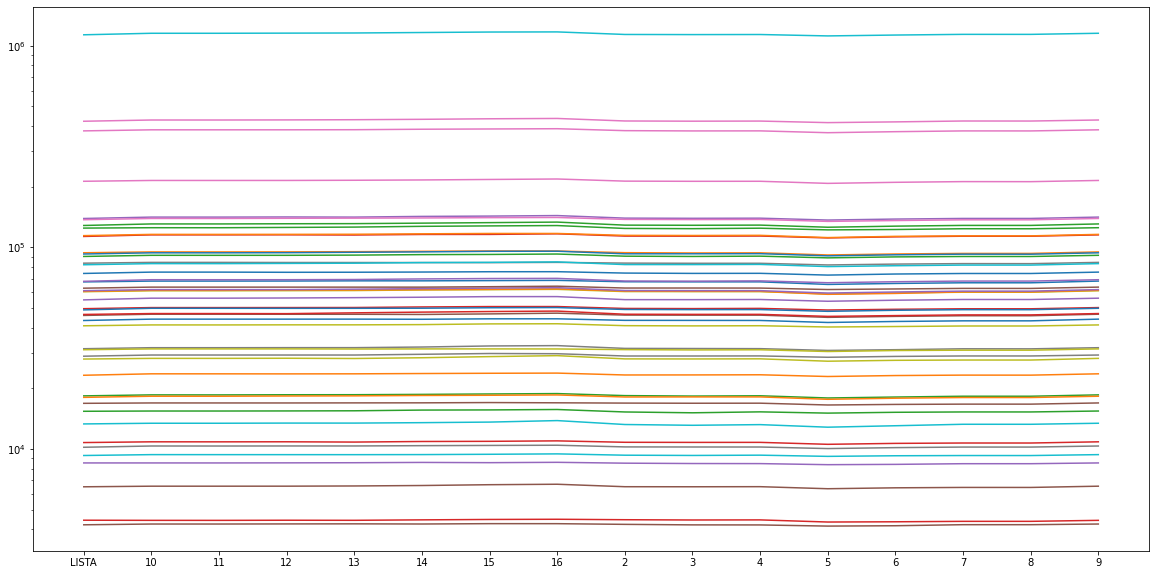

In [13]:
plt.figure(figsize=(20,10))

for i in range(46):
    plt.plot(df_mpo.iloc[i])
    plt.yscale('log')

In [14]:
df_mpo

,LISTA,10,11,12,13,14,15,16,2,3,4,5,6,7,8,9
MUNICIPIO,,,,,,,,,,,,,,,,
1,67427,68054,68052,68093,68244,68241,68422,68611,67541,67450,67463,65505,66245,66750,66736.0,68057
2,94040,94967,94952,95009,95209,95595,96005,95934,94139,93825,93970,91712,92759,93343,93340.0,94967
3,128446,130717,130708,130992,131172,131903,132669,133489,128937,128731,128978,125884,127461,128544,128543.0,130720
4,49656,50281,50273,50287,50324,50647,50867,50877,49787,49699,49818,48907,49311,49596,49596.0,50283
5,67868,69124,69114,69132,69287,69745,70072,70194,68120,67992,68218,66789,67553,68063,68058.0,69125
6,4207,4244,4244,4249,4253,4245,4262,4261,4228,4203,4200,4145,4162,4212,4212.0,4244
7,378361,383002,382980,383071,383484,385535,386714,387848,379387,378139,378402,370594,374915,378228,378153.0,383007
8,31431,31799,31797,31818,31816,32043,32435,32565,31546,31501,31455,30822,31080,31406,31385.0,31800
9,60267,60931,60929,60987,61077,61486,61679,61915,60366,60337,60325,58753,59504,59917,59910.0,60931


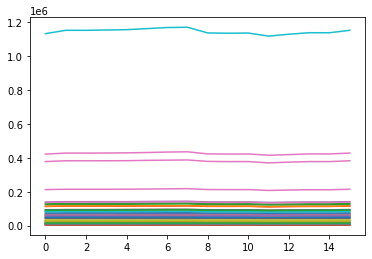

In [15]:
municipios=np.asarray(df_mpo)
municipios[0][:-1]
municipios[0]
for i in range(43):
    plt.plot(municipios[i])

In [17]:
fits=[]
prediction_lnal=[]

for i in range(len(municipios)):
    xx=np.arange(len(municipios[i]))
    ma, ba = np. polyfit(xx, municipios[i],1,w=municipios[i])
    fits.append([ma,ba])
    pred=ma*(xx[-12]+12)+ba
if pred < municipios[i][-1]:
    pred=municipios[i][-1]

    prediction_lnal.append(pred)
fits

[[-94.77726179243723, 68281.2440218028],
 [-124.91619242275524, 95318.1067904757],
 [-171.7596871265727, 131204.94369054295],
 [-50.214114366740866, 50399.106253950435],
 [-79.33779086371712, 69269.58152967198],
 [-3.178932943002218, 4247.446057733423],
 [-405.7676046679554, 383864.02645488875],
 [-35.71244658906666, 31946.606736754045],
 [-80.40417697306063, 61201.65487473306],
 [-5.938578612396552, 9378.364804396711],
 [-75.76848296968315, 75345.0591953864],
 [-21.994617263457894, 23595.717930699073],
 [-23.16168657204819, 18615.315768539174],
 [-119.23697626826328, 115388.25386016724],
 [-160.98970430664164, 141687.4195729261],
 [-15.191386266942434, 16958.673412115753],
 [-442.11666351015293, 429703.3602304527],
 [-24.912052511293954, 29316.531634362393],
 [-38.48453532800247, 41353.332970077005],
 [-1178.7497057622677, 1156316.1331397407],
 [-55.20712983663229, 44061.09021438248],
 [-21.716002373148232, 18341.555750996587],
 [-161.84823952508916, 126247.93658964554],
 [-10.0478715

In [18]:
df_mpo['Prediction LNAL']=prediction_lnal
df_mpo

ValueError: Length of values (1) does not match length of index (46)